In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings('ignore')

In [2]:
car = pd.read_csv("car_price.csv")
car.head()

Unnamed: 0                                car_name car_prices_in_rupee  \
0           0  Jeep Compass 2.0 Longitude Option BSIV          10.03 Lakh   
1           1            Renault Duster RXZ Turbo CVT          12.83 Lakh   
2           2                      Toyota Camry 2.5 G          16.40 Lakh   
3           3                       Honda Jazz VX CVT           7.77 Lakh   
4           4        Volkswagen Polo 1.2 MPI Highline           5.15 Lakh   

   kms_driven fuel_type transmission  ownership  manufacture   engine    Seats  
0  86,226 kms    Diesel       Manual  1st Owner         2017  1956 cc  5 Seats  
1  13,248 kms    Petrol    Automatic  1st Owner         2021  1330 cc  5 Seats  
2  60,343 kms    Petrol    Automatic  1st Owner         2016  2494 cc  5 Seats  
3  26,696 kms    Petrol    Automatic  1st Owner         2018  1199 cc  5 Seats  
4  69,414 kms    Petrol       Manual  1st Owner         2016  1199 cc  5 Seats

## 1. Handling missing values

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [4]:
data2 = car.copy()

### No missing values are present.


In [5]:
# dropping unnamed column will not alter anything in dataset
car = car.drop('Unnamed: 0', axis=1)

In [6]:
car.head()

car_name car_prices_in_rupee  kms_driven  \
0  Jeep Compass 2.0 Longitude Option BSIV          10.03 Lakh  86,226 kms   
1            Renault Duster RXZ Turbo CVT          12.83 Lakh  13,248 kms   
2                      Toyota Camry 2.5 G          16.40 Lakh  60,343 kms   
3                       Honda Jazz VX CVT           7.77 Lakh  26,696 kms   
4        Volkswagen Polo 1.2 MPI Highline           5.15 Lakh  69,414 kms   

  fuel_type transmission  ownership  manufacture   engine    Seats  
0    Diesel       Manual  1st Owner         2017  1956 cc  5 Seats  
1    Petrol    Automatic  1st Owner         2021  1330 cc  5 Seats  
2    Petrol    Automatic  1st Owner         2016  2494 cc  5 Seats  
3    Petrol    Automatic  1st Owner         2018  1199 cc  5 Seats  
4    Petrol       Manual  1st Owner         2016  1199 cc  5 Seats

## Object to int/float : - 

In [7]:
# checking for unique values
car.nunique()

car_name               1896
car_prices_in_rupee    1300
kms_driven             2610
fuel_type                 5
transmission              2
ownership                 6
manufacture              26
engine                  139
Seats                     6
dtype: int64

In [8]:
def carprice(p):
    car_price = []
    for value in p:
        cleaned_value = value.replace(',', '').strip()
        if 'Lakh' in str(value):
            car_price.append(pd.to_numeric(value.replace('Lakh',''))* 100000)
        elif 'Crore' in str(value):
            car_price.append(pd.to_numeric(value.replace('Crore',''))* 10000000)
        elif ',' in str(value):
            car_price.append(pd.to_numeric(value.replace(',', '')))
            
    return car_price  
        

In [9]:
car['car_prices_in_rupee'] = carprice(car['car_prices_in_rupee'])

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   object 
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   object 
 8   Seats                5512 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 387.7+ KB


In [11]:
# as kms_driven is important for our dataset so we will convert dtype into int
car['kms_driven'] = car['kms_driven'].str.replace('[^\d.]','',regex = True)
car['kms_driven']=pd.to_numeric(car['kms_driven'])

In [12]:
car['engine'] = car['engine'].str.replace('[^\d.]','',regex=True)
car['engine']=pd.to_numeric(car['engine'])

In [13]:
car.head()

car_name  car_prices_in_rupee  kms_driven  \
0  Jeep Compass 2.0 Longitude Option BSIV            1003000.0       86226   
1            Renault Duster RXZ Turbo CVT            1283000.0       13248   
2                      Toyota Camry 2.5 G            1640000.0       60343   
3                       Honda Jazz VX CVT             777000.0       26696   
4        Volkswagen Polo 1.2 MPI Highline             515000.0       69414   

  fuel_type transmission  ownership  manufacture  engine    Seats  
0    Diesel       Manual  1st Owner         2017    1956  5 Seats  
1    Petrol    Automatic  1st Owner         2021    1330  5 Seats  
2    Petrol    Automatic  1st Owner         2016    2494  5 Seats  
3    Petrol    Automatic  1st Owner         2018    1199  5 Seats  
4    Petrol       Manual  1st Owner         2016    1199  5 Seats

In [14]:
car.isna().sum()

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

<Axes: >

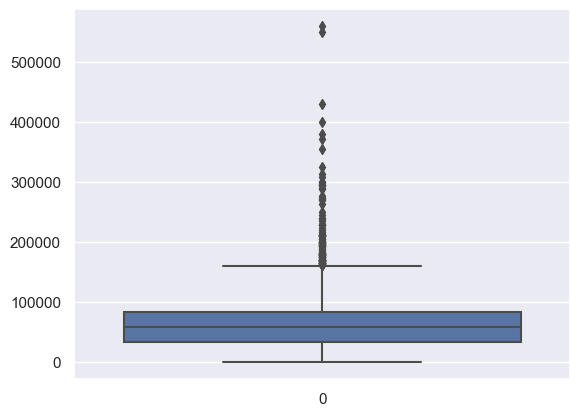

In [15]:
sns.boxplot(car['kms_driven'])

In [16]:

# treating outliers from column kms_driven
Q1 = car['kms_driven'].quantile(0.25)
Q3 = car['kms_driven'].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1-1.5*IQR
print('Q1: ',Q1)
print('Q3: ',Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

Q1:  33151.75
Q3:  84265.25
IQR:  51113.5
upper limit:  160935.5
lower limit:  -43518.5


In [17]:
car['kms_driven']= np.where(car['kms_driven']>upper_limit,upper_limit,
                           np.where(car['kms_driven']<lower_limit,lower_limit,
                                   car['kms_driven']))

<Axes: >

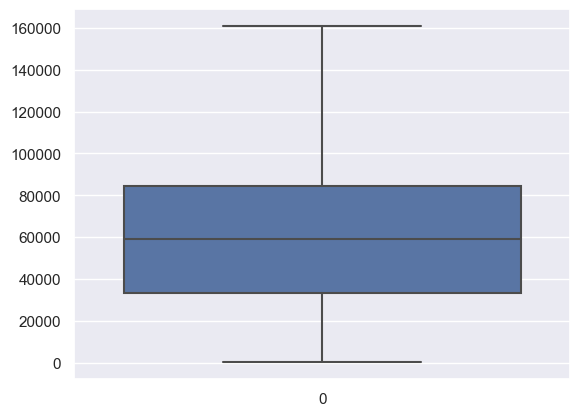

In [18]:
sns.boxplot(car['kms_driven'])

In [19]:
# engine
Q1 = car['engine'].quantile(0.25)
Q3 = car['engine'].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1-1.5*IQR
print('Q1: ',Q1)
print('Q3: ',Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

Q1:  1197.0
Q3:  1950.0
IQR:  753.0
upper limit:  3079.5
lower limit:  67.5


In [20]:
car['engine']= np.where(car['engine']>upper_limit,upper_limit,
                           np.where(car['engine']<lower_limit,lower_limit,
                                   car['engine']))

<Axes: >

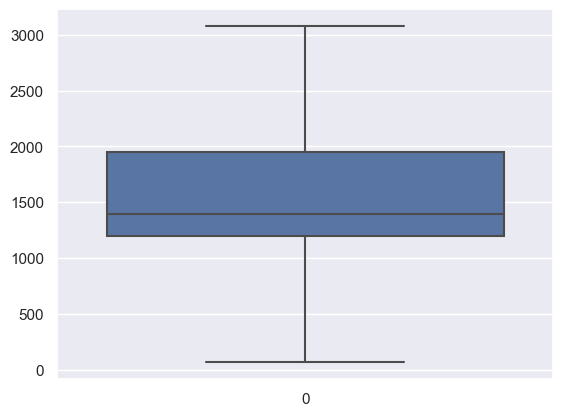

In [21]:
sns.boxplot(car['engine'])

In [22]:
car['car_prices_in_rupee'].describe()

count    5.512000e+03
mean     1.162510e+06
std      1.969919e+06
min      3.500000e+04
25%      3.150000e+05
50%      5.500000e+05
75%      1.025750e+06
max      1.920000e+07
Name: car_prices_in_rupee, dtype: float64

In [23]:
pd.DataFrame(car['manufacture']>2005).value_counts()

manufacture
True           5437
False            75
Name: count, dtype: int64

In [24]:
pd.set_option('display.max_rows',6000)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width',6000)

In [25]:
car

car_name  car_prices_in_rupee  kms_driven fuel_type transmission  ownership  manufacture  engine    Seats
0                Jeep Compass 2.0 Longitude Option BSIV            1003000.0     86226.0    Diesel       Manual  1st Owner         2017  1956.0  5 Seats
1                          Renault Duster RXZ Turbo CVT            1283000.0     13248.0    Petrol    Automatic  1st Owner         2021  1330.0  5 Seats
2                                    Toyota Camry 2.5 G            1640000.0     60343.0    Petrol    Automatic  1st Owner         2016  2494.0  5 Seats
3                                     Honda Jazz VX CVT             777000.0     26696.0    Petrol    Automatic  1st Owner         2018  1199.0  5 Seats
4                      Volkswagen Polo 1.2 MPI Highline             515000.0     69414.0    Petrol       Manual  1st Owner         2016  1199.0  5 Seats
5                  Volkswagen Vento 1.2 TSI Highline AT             766000.0     49719.0    Petrol    Automatic  1st Owner         2017  1197.0  5 Seats
6             Volkswagen Vento 1.2 TSI Highline Plus AT             758000.0     43688.0    Petrol    Automatic  1st Owner         2017  1197.0  5 Seats
7                                  Honda WR-V VX Diesel            1160000.0     14470.0    Diesel       Manual  1st Owner         2021  1498.0  5 Seats
8                              Honda City i VTEC CVT SV             699000.0     21429.0    Petrol    Automatic  1st Owner         2015  1497.0  5 Seats
9                         Renault Duster Petrol RXS CVT             753000.0     31750.0    Petrol    Automatic  1st Owner         2017  1498.0  5 Seats
10                              Maruti Baleno 1.2 Alpha             643000.0     38203.0    Petrol       Manual  1st Owner         2017  1197.0  5 Seats
11                             Honda City i VTEC CVT SV             543000.0    110284.0    Petrol    Automatic  1st Owner         2014  1497.0  5 Seats
12                                   Mahindra XUV300 W6             862000.0     10381.0    Petrol       Manual  1st Owner         2020  1197.0  5 Seats
13                   Jeep Compass 1.4 Limited Plus BSIV            1678000.0     32378.0    Petrol    Automatic  1st Owner         2019  1368.0  5 Seats
14                                      Honda City V MT            1003000.0     38906.0    Petrol       Manual  1st Owner         2020  1498.0  5 Seats
15                            Hyundai Grand i10 AT Asta             563000.0     59313.0    Petrol    Automatic  2nd Owner         2016  1197.0  5 Seats
16                                 Hyundai i20 1.4 Asta             667000.0     85672.0    Diesel       Manual  1st Owner         2017  1396.0  5 Seats
17                                Maruti Ciaz 1.4 Delta             673000.0     34971.0    Petrol       Manual  2nd Owner         2017  1373.0  5 Seats
18                             Nissan Micra XL Optional             321000.0     35894.0    Petrol       Manual  2nd Owner         2015  1198.0  5 Seats
19                     Maruti Ciaz Alpha Automatic BSIV             850000.0     56000.0    Petrol    Automatic  1st Owner         2019  1462.0  5 Seats
20                               Maruti Swift Dzire VXI             434000.0     56568.0    Petrol       Manual  1st Owner         2014  1197.0  5 Seats
21                                     Renault KWID RXT             311000.0     48872.0    Petrol       Manual  1st Owner         2017   799.0  5 Seats
22                                Renault KWID RXL BSIV             370000.0     17346.0    Petrol       Manual  1st Owner         2019   799.0  5 Seats
23                   Jeep Compass 2.0 Limited Plus BSIV            1588000.0     15414.0    Diesel       Manual  1st Owner         2019  1956.0  5 Seats
24               Hyundai Grand i10 1.2 Kappa Magna BSIV             541000.0     21239.0    Petrol       Manual  1st Owner         2018  1197.0  5 Seats
25                                  Maruti Alto K10 LXI             2

In [26]:
car['car_name'].value_counts()

car_name
Maruti Alto 800 LXI                                        53
Maruti Swift VXI                                           46
Maruti Wagon R VXI BS IV                                   43
Maruti Swift Dzire VDI                                     42
Maruti Swift Dzire VXI                                     42
Maruti Swift VDI BSIV                                      35
Maruti Wagon R LXI BS IV                                   29
Maruti Alto K10 VXI                                        28
Maruti Swift VDI                                           26
Maruti Wagon R LXI CNG                                     25
Hyundai Grand i10 Magna                                    23
Mercedes-Benz GLE 250d                                     21
Hyundai Grand i10 Sportz                                   21
Honda City i VTEC CVT VX                                   20
Maruti Alto LXi                                            20
Maruti Baleno 1.2 Delta                                    19

In [27]:
car['brand'] = car['car_name'].apply(lambda x: x.split()[0])

In [28]:
car['model'] = car['car_name'].apply(lambda x: x.split()[1])

In [29]:
car['version'] = car['car_name'].apply(lambda x: x.split()[2])

In [30]:
car['model'].value_counts()

model
Swift        388
i20          237
City         221
Wagon        206
Alto         192
Grand        153
Verna        125
i10          119
Amaze        118
Creta        117
Baleno       115
XUV500       102
Innova        88
Ciaz          88
Ertiga        85
C-Class       79
Polo          73
Duster        71
Ecosport      70
Santro        66
EON           64
Fortuner      59
Vento         57
Vitara        56
KWID          56
Scorpio       52
Seltos        51
Rover         50
Jazz          50
Hector        49
Compass       48
E-Class       46
Venue         44
Xcent         43
Rapid         41
GLC           41
Celerio       40
Zen           38
SX4           38
Tiago         38
Figo          37
Etios         37
3             37
Bolero        36
A6            36
Harrier       36
Nexon         36
5             35
Corolla       33
Eeco          32
X1            31
A4            31
Q3            31
Indigo        30
Beat          30
GLE           28
Thar          28
TUV           27
WR-V    

In [31]:
car.head()

car_name  car_prices_in_rupee  kms_driven fuel_type transmission  ownership  manufacture  engine    Seats       brand    model version
0  Jeep Compass 2.0 Longitude Option BSIV            1003000.0     86226.0    Diesel       Manual  1st Owner         2017  1956.0  5 Seats        Jeep  Compass     2.0
1            Renault Duster RXZ Turbo CVT            1283000.0     13248.0    Petrol    Automatic  1st Owner         2021  1330.0  5 Seats     Renault   Duster     RXZ
2                      Toyota Camry 2.5 G            1640000.0     60343.0    Petrol    Automatic  1st Owner         2016  2494.0  5 Seats      Toyota    Camry     2.5
3                       Honda Jazz VX CVT             777000.0     26696.0    Petrol    Automatic  1st Owner         2018  1199.0  5 Seats       Honda     Jazz      VX
4        Volkswagen Polo 1.2 MPI Highline             515000.0     69414.0    Petrol       Manual  1st Owner         2016  1199.0  5 Seats  Volkswagen     Polo     1.2

In [32]:
car = car.drop('car_name',axis = 1)

# Label Encoder

In [33]:
# price of car depends on different factors we cannot replace these outliers
# going char treatment
from sklearn.preprocessing import LabelEncoder
leb_eco = LabelEncoder()

In [34]:
car['fuel_type'] =leb_eco.fit_transform(car['fuel_type'])

In [35]:
car['transmission'] = leb_eco.fit_transform(car['transmission'])

In [36]:
car['ownership'] = leb_eco.fit_transform(car['ownership'])

In [37]:
car['Seats'] = leb_eco.fit_transform(car['Seats'])

In [38]:
car['manufacture'] = leb_eco.fit_transform(car['manufacture'])

In [39]:
car['brand'] = leb_eco.fit_transform(car['brand'])

In [40]:
car['model'] = leb_eco.fit_transform(car['model'])

In [41]:
car['version'] = leb_eco.fit_transform(car['version'])

In [42]:
car.head()

car_prices_in_rupee  kms_driven  fuel_type  transmission  ownership  manufacture  engine  Seats  brand  model  version
0            1003000.0     86226.0          1             1          1           20  1956.0      2     12     47       18
1            1283000.0     13248.0          4             0          1           24  1330.0      2     26     54      239
2            1640000.0     60343.0          4             0          1           19  2494.0      2     29     39       23
3             777000.0     26696.0          4             0          1           21  1199.0      2      8     99      304
4             515000.0     69414.0          4             1          1           19  1199.0      2     30    138        3

In [43]:
car.describe()

car_prices_in_rupee     kms_driven    fuel_type  transmission    ownership  manufacture       engine        Seats        brand        model      version
count         5.512000e+03    5512.000000  5512.000000   5512.000000  5512.000000  5512.000000  5512.000000  5512.000000  5512.000000  5512.000000  5512.000000
mean          1.162510e+06   62051.672805     2.613026      0.718795     1.421807    18.455914  1521.585269     2.251633    15.462264   116.922533   167.292997
std           1.969919e+06   36760.162957     1.510117      0.449628     0.703092     3.926176   533.798048     0.716600     8.130917    72.755654   119.098422
min           3.500000e+04     250.000000     0.000000      0.000000     0.000000     0.000000    67.500000     0.000000     0.000000     0.000000     0.000000
25%           3.150000e+05   33151.750000     1.000000      0.000000     1.000000    16.000000  1197.000000     2.000000     9.000000    49.000000    44.000000
50%           5.500000e+05   59000.000000     4.000000      1.000000     1.000000    19.000000  1396.000000     2.000000    18.000000   102.000000   168.000000
75%           1.025750e+06   84265.250000     4.000000      1.000000     2.000000    21.000000  1950.000000     2.000000    20.000000   183.000000   271.000000
max           1.920000e+07  160935.500000     4.000000      1.000000     5.000000    25.000000  3079.500000     5.000000    31.000000   229.000000   360.000000

# Feature scaling

In [44]:
car.head()

car_prices_in_rupee  kms_driven  fuel_type  transmission  ownership  manufacture  engine  Seats  brand  model  version
0            1003000.0     86226.0          1             1          1           20  1956.0      2     12     47       18
1            1283000.0     13248.0          4             0          1           24  1330.0      2     26     54      239
2            1640000.0     60343.0          4             0          1           19  2494.0      2     29     39       23
3             777000.0     26696.0          4             0          1           21  1199.0      2      8     99      304
4             515000.0     69414.0          4             1          1           19  1199.0      2     30    138        3

In [45]:
x = car.iloc[:,1:10] 
y= car.iloc[:,0:1]

In [46]:
x.head()

kms_driven  fuel_type  transmission  ownership  manufacture  engine  Seats  brand  model
0     86226.0          1             1          1           20  1956.0      2     12     47
1     13248.0          4             0          1           24  1330.0      2     26     54
2     60343.0          4             0          1           19  2494.0      2     29     39
3     26696.0          4             0          1           21  1199.0      2      8     99
4     69414.0          4             1          1           19  1199.0      2     30    138

In [47]:
y.head()

car_prices_in_rupee
0            1003000.0
1            1283000.0
2            1640000.0
3             777000.0
4             515000.0

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
pd.DataFrame(sc_x)

0         1         2         3         4         5         6         7         8
0     0.657683 -1.068243  0.625473 -0.599986  0.393315  0.813892 -0.351180 -0.425853 -0.961147
1    -1.327744  0.918538 -1.598790 -0.599986  1.412211 -0.358942 -0.351180  1.296126 -0.864926
2    -0.046486  0.918538 -1.598790 -0.599986  0.138592  1.821856 -0.351180  1.665122 -1.071114
3    -0.961880  0.918538 -1.598790 -0.599986  0.648039 -0.604376 -0.351180 -0.917847 -0.246361
4     0.200298  0.918538  0.625473 -0.599986  0.138592 -0.604376 -0.351180  1.788120  0.289728
5    -0.335521  0.918538 -1.598790 -0.599986  0.393315 -0.608123 -0.351180  1.788120  1.073244
6    -0.499599  0.918538 -1.598790 -0.599986  0.393315 -0.608123 -0.351180  1.788120  1.073244
7    -1.294499 -1.068243  0.625473 -0.599986  1.412211 -0.044188 -0.351180 -0.917847  1.155719
8    -1.105174  0.918538 -1.598790 -0.599986 -0.116132 -0.046061 -0.351180 -0.917847 -1.002385
9    -0.824382  0.918538 -1.598790 -0.599986  0.393315 -0.044188 -0.351180  1.296126 -0.864926
10   -0.648823  0.918538  0.625473 -0.599986  0.393315 -0.608123 -0.351180  0.312138 -1.208573
11    1.312200  0.918538 -1.598790 -0.599986 -0.370856 -0.046061 -0.351180 -0.917847 -1.002385
12   -1.405744  0.918538  0.625473 -0.599986  1.157487 -0.608123 -0.351180  0.189139  1.361907
13   -0.807297  0.918538 -1.598790 -0.599986  0.902763 -0.287748 -0.351180 -0.425853 -0.961147
14   -0.629697  0.918538  0.625473 -0.599986  1.157487 -0.044188 -0.351180 -0.917847 -1.002385
15   -0.074508  0.918538 -1.598790  0.822432  0.138592 -0.608123 -0.351180 -0.794849 -0.397566
16    0.642611 -1.068243  0.625473 -0.599986  0.393315 -0.235289 -0.351180 -0.794849  1.526858
17   -0.736752  0.918538  0.625473  0.822432  0.393315 -0.278380 -0.351180  0.312138 -1.016130
18   -0.711641  0.918538  0.625473  0.822432 -0.116132 -0.606249 -0.351180  0.927130  0.069794
19   -0.164641  0.918538 -1.598790 -0.599986  0.902763 -0.111635 -0.351180  0.312138 -1.016130
20   -0.149188  0.918538  0.625473 -0.599986 -0.370856 -0.608123 -0.351180  0.312138  0.867055
21   -0.358564  0.918538  0.625473 -0.599986  0.393315 -1.353791 -0.351180  1.296126 -0.191378
22   -1.216255  0.918538  0.625473 -0.599986  0.902763 -1.353791 -0.351180  1.296126 -0.191378
23   -1.268817 -1.068243  0.625473 -0.599986  0.902763  0.813892 -0.351180 -0.425853 -0.961147
24   -1.110343  0.918538  0.625473 -0.599986  0.648039 -0.608123 -0.351180 -0.794849 -0.397566
25    0.008416  0.918538  0.625473 -0.599986 -0.370856 -0.980957 -0.351180  0.312138 -1.387269
26    0.470044  0.918538  0.625473  0.822432 -0.116132  0.130051 -0.351180 -0.794849  1.114481
27   -1.363194  0.918538 -1.598790 -0.599986  1.412211  0.894454 -0.351180 -0.794849  1.018260
28   -0.291855  0.918538  0.625473 -0.599986  0.648039 -0.608123 -0.351180  0.312138  0.867055
29   -1.532631  0.918538  0.625473 -0.599986  1.412211 -0.979083 -0.351180  0.927130  0.001065
30   -0.425354  0.918538 -1.598790 -0.599986  0.138592 -0.046061 -0.351180 -0.917847 -1.002385
31    1.036796  0.918538  0.625473 -0.599986 -0.116132 -0.606249 -0.351180 -0.917847 -1.346032
32   -0.724428  0.918538  0.625473 -0.599986  0.138592 -0.608123 -0.351180 -0.794849 -0.397566
33   -0.298357  0.918538  0.625473 -0.599986  0.393315 -1.325688 -0.351180 -0.794849 -0.837434
34   -0.845249  0.918538  0.625473 -0.599986  0.138592 -1.359411 -0.351180  0.312138 -1.387269
35   -0.799054  0.918538  0.625473 -0.599986  0.138592 -1.353791 -0.351180  1.296126 -0.191378
36   -0.121628  0.918538  0.625473  0.822432 -0.370856 -1.325688 -0.351180 -0.794849 -0.837434
37   -0.604804  0.918538 -1.598790 -0.599986  0.138592 -0.604376 -0.351180 -0.917847 -0.246361
38   -1.111785  0.918538  0.625473 -0.599986  0.648039 -1.359411 -0.351180  0.312138 -1.387269
39   -0.736725  0.918538  0.625473 -0.599986  0.648039 -1.353791 -0.351180  1.296126 -0.191378
40   -0.419750  0.918538  0.625473  0.822432 -0.116132 -0.606249 -0.351180 -0.917847 -1.346032
41   -1.183309  0.91853

In [49]:
var = sc_x
var.shape

(5512, 9)

# Multicollinearity - VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor']= [variance_inflation_factor(var,i) for i in range(var.shape[1])]

vif['features'] = x.columns

In [51]:
vif

variance_inflation_factor      features
0                   1.663357    kms_driven
1                   1.204501     fuel_type
2                   1.162667  transmission
3                   1.244947     ownership
4                   1.670557   manufacture
5                   1.061642        engine
6                   1.026613         Seats
7                   1.023432         brand
8                   1.022404         model

# correlation

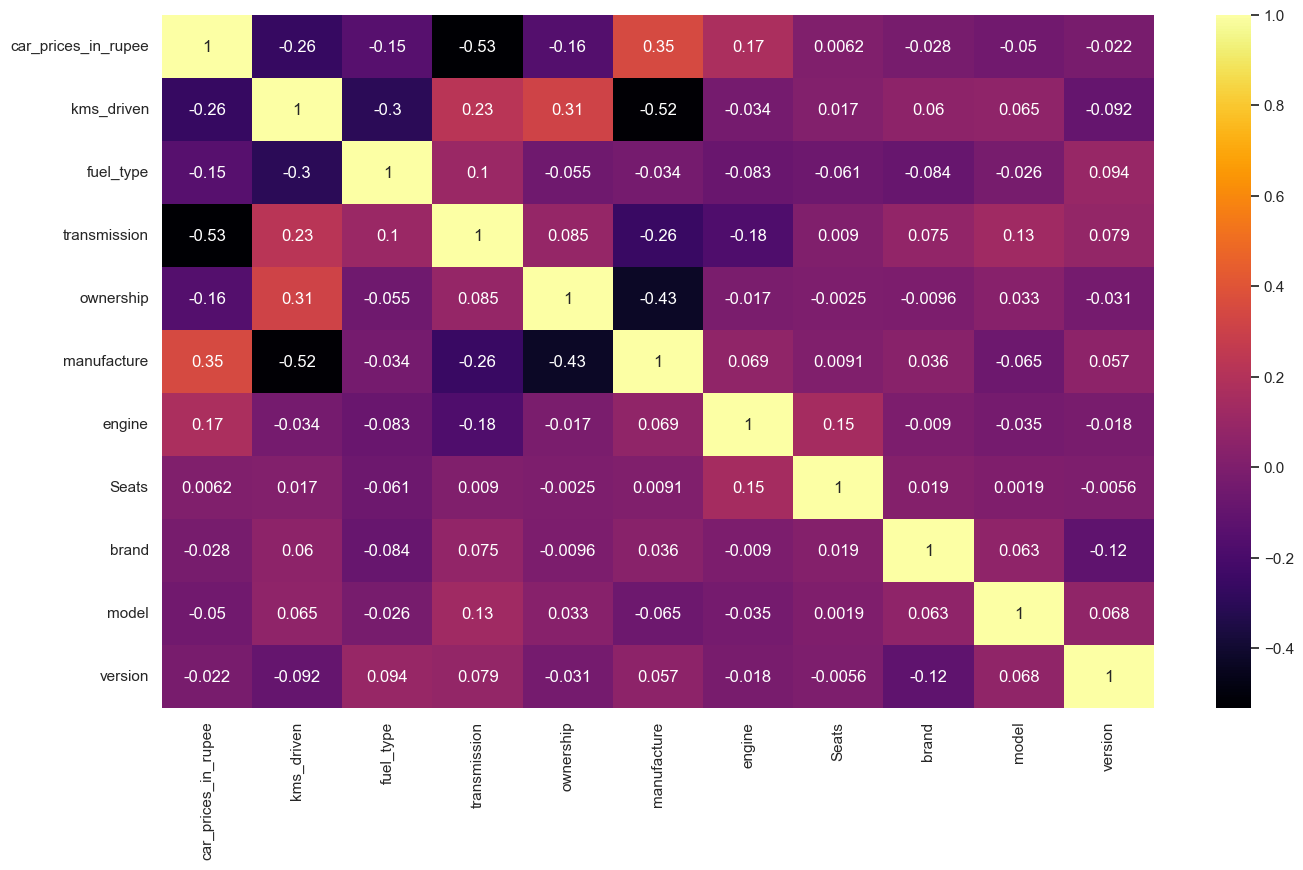

In [52]:
plt.figure(figsize= (16,9))
sns.heatmap(car.corr(),annot = True, cmap='inferno')
plt.show()

# train and test spliting dataset

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =101)

In [54]:
x_train.shape

(4409, 9)

In [55]:
x_test.shape

(1103, 9)

In [56]:
y_test.shape

(1103, 1)

# Building a regression model

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
print(lm.coef_)
print('******'*10)
print(lm.intercept_)

[[-5.17988047e+00 -1.58926074e+05 -1.86786186e+06 -5.90066183e+04
   8.11138096e+04  2.09919203e+02 -2.63629024e+04 -1.33564357e+03
   5.67555020e+02]]
************************************************************
[1501894.21666774]


# predict test dataset with linear model

In [59]:
y_pred = lm.predict(x_test)
y_pred

array([[ 604719.73886996],
       [ 481650.12066044],
       [ 708229.51736587],
       ...,
       [ 773425.00553705],
       [ 562967.35727552],
       [3493604.98819286]])

In [60]:
from sklearn.metrics import r2_score
print("Accuracy :", r2_score(y_test, y_pred))

Accuracy : 0.3283758483265069


# Evalution

In [61]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [62]:
reg = smf.OLS(endog=y_train,exog=x_train).fit()

In [63]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_prices_in_rupee   R-squared (uncentered):                   0.530
Model:                             OLS   Adj. R-squared (uncentered):              0.529
Method:                  Least Squares   F-statistic:                              550.5
Date:                 Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                         20:34:29   Log-Likelihood:                         -68923.
No. Observations:                 4409   AIC:                                  1.379e+05
Df Residuals:                     4400   BIC:                                  1.379e+05
Df Model:                            9                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
kms_driven      -2.6248      0.682     -3.851      0.000      -3.961      -1.288
fuel_type    -1.139e+05   1.49e+04     -7.646      0.000   -1.43e+05   -8.47e+04
transmission -1.798e+06   5.28e+04    -34.052      0.000    -1.9e+06   -1.69e+06
ownership     3.283e+04   3.25e+04      1.010      0.312   -3.09e+04    9.65e+04
manufacture   1.198e+05   4358.987     27.492      0.000    1.11e+05    1.28e+05
engine         286.7663     41.714      6.875      0.000     204.986     368.546
Seats         2.946e+04   3.08e+04      0.956      0.339    -3.1e+04    8.99e+04
brand          972.2170   2771.055      0.351      0.726   -4460.446    6404.880
model          881.0257    308.562      2.855      0.004     276.088    1485.963
==============================================================================
Omnibus:                     4662.497   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           394304.951
Skew:                           5.231   Prob(JB):                         0.00
Kurtosis:                      48.132   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

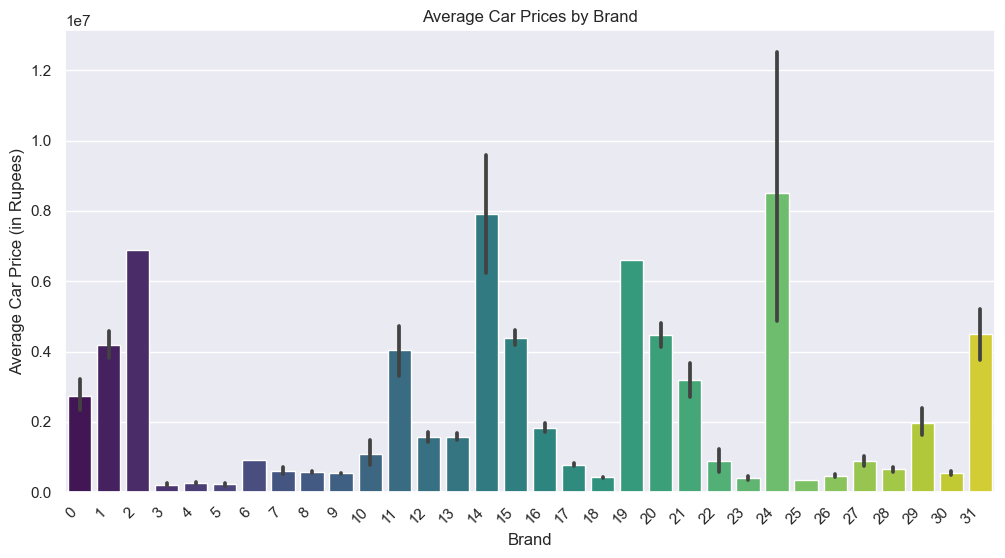

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='car_prices_in_rupee', data=car, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Car Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Car Price (in Rupees)')
plt.show()

In [65]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_prices_in_rupee  5512 non-null   float64
 1   kms_driven           5512 non-null   float64
 2   fuel_type            5512 non-null   int32  
 3   transmission         5512 non-null   int32  
 4   ownership            5512 non-null   int32  
 5   manufacture          5512 non-null   int64  
 6   engine               5512 non-null   float64
 7   Seats                5512 non-null   int32  
 8   brand                5512 non-null   int32  
 9   model                5512 non-null   int32  
 10  version              5512 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 323.1 KB


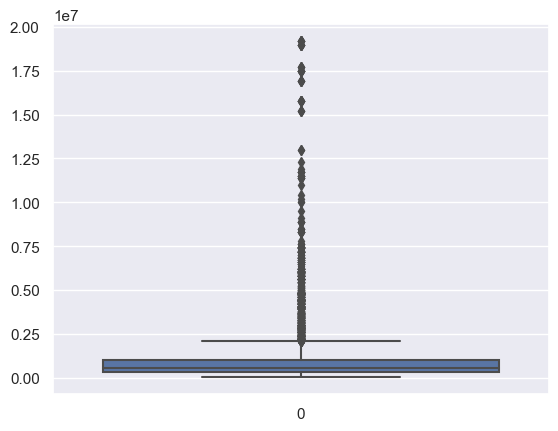

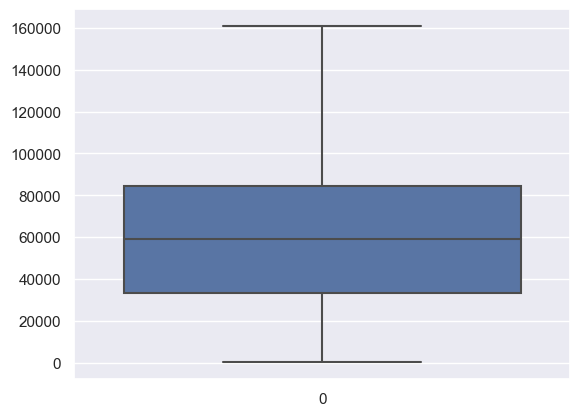

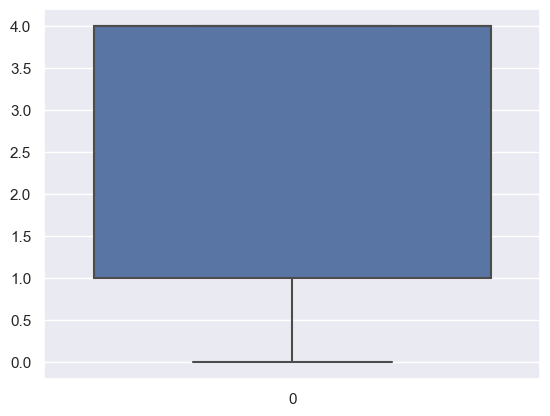

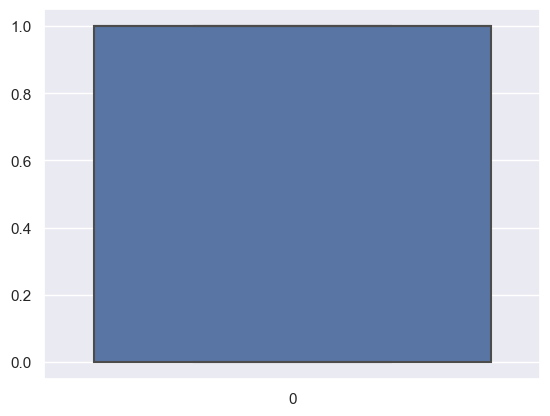

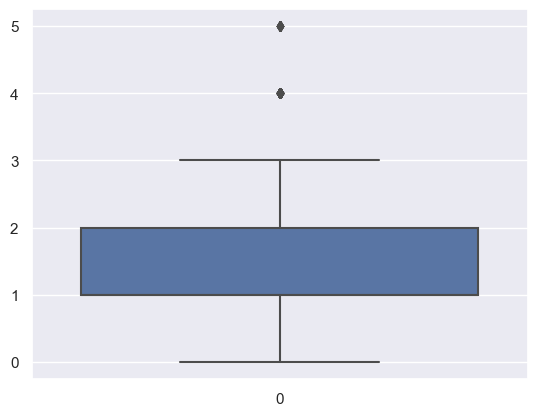

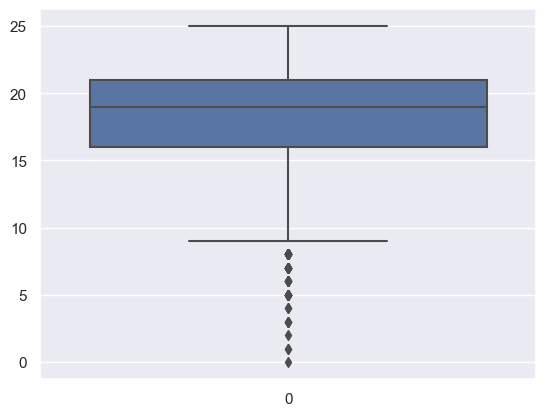

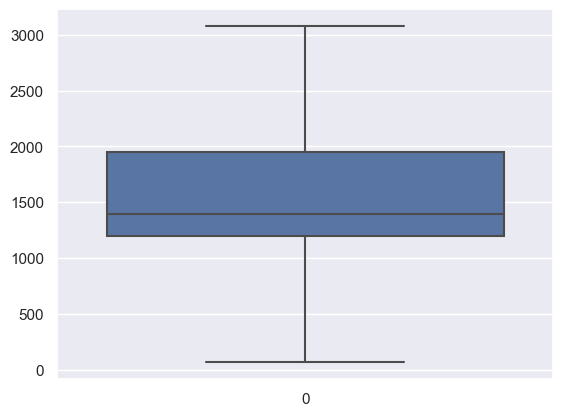

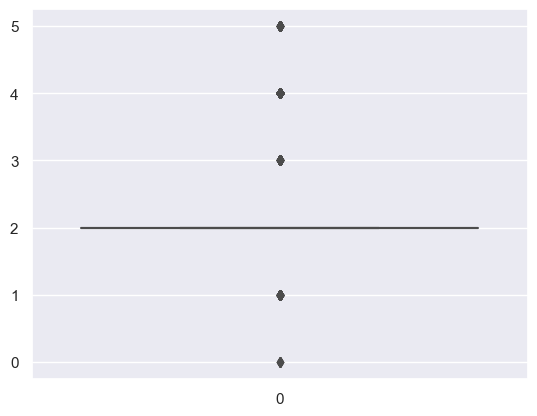

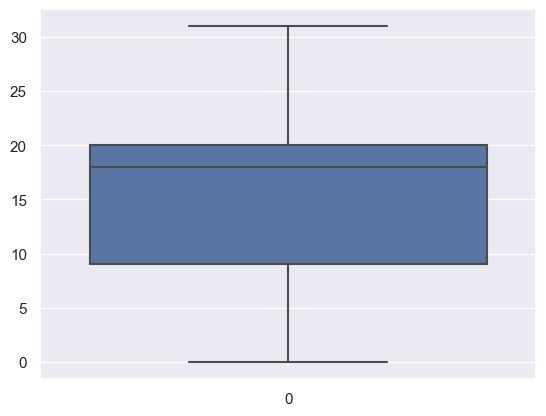

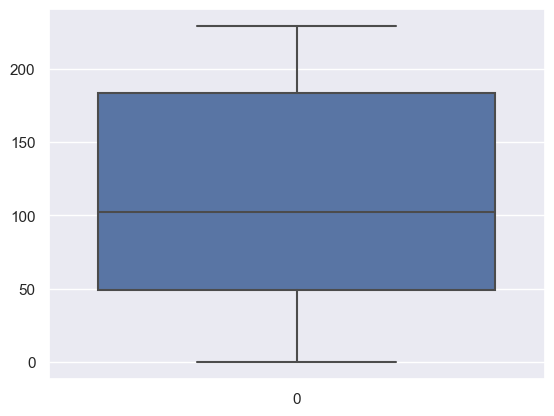

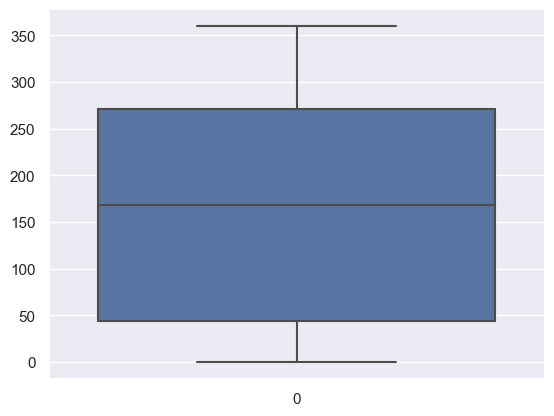

In [66]:
def boxplots(col):
    sns.boxplot(car[col])
    plt.show()

for i in list(car.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [67]:
car.head()

car_prices_in_rupee  kms_driven  fuel_type  transmission  ownership  manufacture  engine  Seats  brand  model  version
0            1003000.0     86226.0          1             1          1           20  1956.0      2     12     47       18
1            1283000.0     13248.0          4             0          1           24  1330.0      2     26     54      239
2            1640000.0     60343.0          4             0          1           19  2494.0      2     29     39       23
3             777000.0     26696.0          4             0          1           21  1199.0      2      8     99      304
4             515000.0     69414.0          4             1          1           19  1199.0      2     30    138        3